Jovany Gonzalez <br>
CISB 63

<h2>Text Summarization</h2>

For this project, I wanted to see what is the most common words in one topic and try to see if they appear in other various topics from BBC News. <br>

Link to my dataset <a href='https://www.kaggle.com/datasets/pariza/bbc-news-summary'>my dataset. </a>

<a href='https://github.com/ojdgonzo/CISB62_Midterm---JGonzalez'>Personal Github link </a> 

In [105]:
# importing our necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import spacy
from spacy import displacy
from wordcloud import WordCloud
from PIL import Image


# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
# I will only use a small portion of the dataset
# file path
# data\BBC News Summary\BBC News Summary\News Articles\business
text1 = open("data/BBC News Summary/BBC News Summary/News Articles/business/001.txt")
text2 = open("data/BBC News Summary/BBC News Summary/News Articles/entertainment/002.txt")
text3 = open("data/BBC News Summary/BBC News Summary/News Articles/politics/003.txt")


# reading our text files
text1 = text1.read()
text2 = text2.read()
text3 = text3.read()

print(f"This is the length of the first text document: {len(text1)}")
print("--- \nText: \n")
print(text1)

This is the length of the first text document: 2560
--- 
Text: 

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service

In [38]:
print(f"This is the length of the second text document: {len(text2)}")
print("--- \nText: \n")
print(text2)

This is the length of the second text document: 1582
--- 
Text: 

Jarre joins fairytale celebration

French musician Jean-Michel Jarre is to perform at a concert in Copenhagen to mark the bicentennial of the birth of writer Hans Christian Andersen.

Denmark is holding a three-day celebration of the life of the fairy-tale author, with a concert at Parken stadium on 2 April. Other stars are expected to join the line-up in the coming months, and the Danish royal family will attend. "Christian Andersen's fairy tales are timeless and universal," said Jarre. "For all of us, at any age there is always - beyond the pure enjoyment of the tale - a message to learn." There are year-long celebrations planned across the world to celebrate Andersen and his work, which includes The Emperor's New Clothes and The Little Mermaid. Denmark's Crown Prince Frederik and Crown Princess Mary visited New York on Monday to help promote the festivities. The pair were at a Manhattan library to honour US literary c

In [39]:
print(f"This is the length of the first text document: {len(text3)}")
print("--- \nText: \n")
print(text3)

This is the length of the first text document: 3109
--- 
Text: 

Hewitt decries 'career sexism'

Plans to extend paid maternity leave beyond six months should be prominent in Labour's election manifesto, the Trade and Industry Secretary has said.

Patricia Hewitt said the cost of the proposals was being evaluated, but it was an "increasingly high priority" and a "shared goal across government". Ms Hewitt was speaking at a gender and productivity seminar organised by the Equal Opportunities Commission (EOC). Mothers can currently take up to six months' paid leave - and six unpaid. Ms Hewitt told the seminar: "Clearly, one of the things we need to do in the future is to extend the period of payment for maternity leave beyond the first six months into the second six months. "We are looking at how quickly we can do that, because obviously there are cost implications because the taxpayer reimburses the employers for the cost of that."

Ms Hewitt also announced a new drive to help women who 

In [43]:
# tokenizing our text
stoken1 = sent_tokenize(text1)
stoken2 = sent_tokenize(text2)
stoken3 = sent_tokenize(text3)

In [46]:
# checking the other sentences length
print(len(stoken1))
print(len(stoken2))
print(len(stoken3))

20
13
26


In [62]:
# a small sample of the senteces from each token
stoken1[4:8]

['Time Warner said on Friday that it now owns 8% of search-engine Google.',
 'But its own internet business, AOL, had has mixed fortunes.',
 'It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.',
 "However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues."]

In [58]:
stoken2[8:13]

['"Bloom recognizes the darker aspects of Andersen\'s authorship," Prince Frederik said.',
 "Bloom is to be formally presented with the Hans Christian Andersen Award this spring in Anderson's hometown of Odense.",
 'The royal couple also visited the Hans Christian Anderson School complex, where Queen Mary read The Ugly Duckling to the young audience.',
 'Later at a gala dinner, Danish supermodel Helena Christensen was named a Hans Christian Andersen ambassador.',
 'Other ambassadors include actors Harvey Keitel and Sir Roger Moore, athlete Cathy Freeman and Brazilian soccer legend Pele.']

In [61]:
stoken3[16:22]

['"But it is also about saying childcare jobs are really there for women and not suitable for men.',
 'Career sexism goes both ways."',
 'She added that while progress had been made, there was still a gap in pay figures.',
 '"The average woman working full-time is being paid about 80p for every pound a man is earning.',
 'For women working part-time it is 60p."',
 'The Department for Trade and Industry will also provide funding to help a new pay experts panel run by the TUC.']

In [64]:
# word tokenizing
words1 = word_tokenize(text1)
words2 = word_tokenize(text2)
words3 = word_tokenize(text3)

In [67]:
# total amount of words in each document
print(len(words1))
print(len(words2))
print(len(words3))

490
288
604


In [69]:
fdist1 = FreqDist(words1)
fdist2 = FreqDist(words2)
fdist3 = FreqDist(words3)

In [73]:
# finding the most common words between the three different articles
print(f"These are the 20 most commons words in the Business article: \n {fdist1.most_common(20)}")
print(f"These are the 20 most commons words in the Entertainment article: \n {fdist2.most_common(20)}")
print(f"These are the 20 most commons words in the Politics article: \n {fdist3.most_common(20)}")

These are the 20 most commons words in the Business article: 
 [(',', 21), ('.', 20), ('to', 18), ('the', 17), ('of', 12), ('and', 10), ('$', 9), ('%', 8), ('a', 8), ('TimeWarner', 7), ('in', 7), ('AOL', 7), ('by', 6), ('it', 6), ('profit', 5), ('profits', 5), ('for', 5), ('which', 5), ('is', 5), ('said', 5)]
These are the 20 most commons words in the Entertainment article: 
 [('the', 16), ('.', 13), ('to', 9), (',', 9), ('of', 8), ('a', 7), ('and', 7), ('Andersen', 6), ('at', 5), ('Christian', 5), ("'s", 5), ('The', 5), ('is', 4), ('Hans', 4), ('``', 4), ("''", 4), ('Jarre', 3), ('in', 3), ('are', 3), ('Bloom', 3)]
These are the 20 most commons words in the Politics article: 
 [('the', 27), ('.', 26), (',', 19), ('and', 14), ('``', 14), ('to', 13), ('of', 13), ('for', 12), ('women', 12), ('is', 11), ('in', 9), ("''", 9), ('a', 8), ('that', 8), ('six', 6), ('was', 6), ('are', 6), ('about', 6), ('Hewitt', 5), ('sexism', 5)]


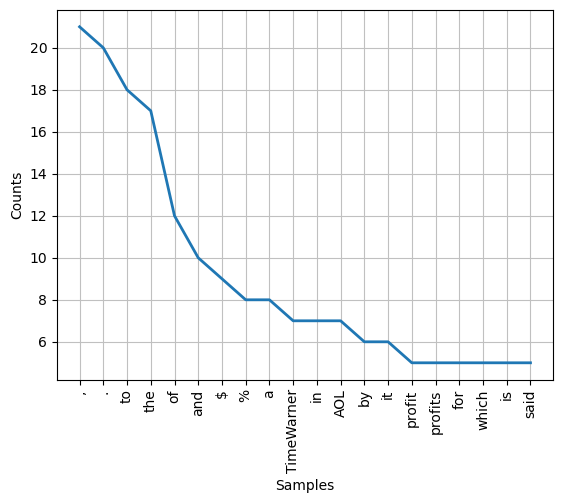

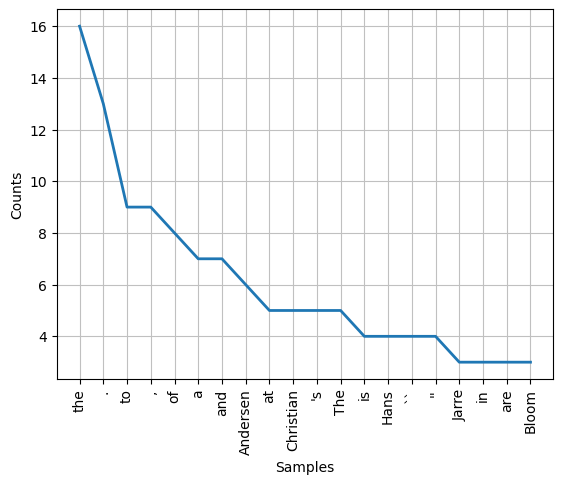

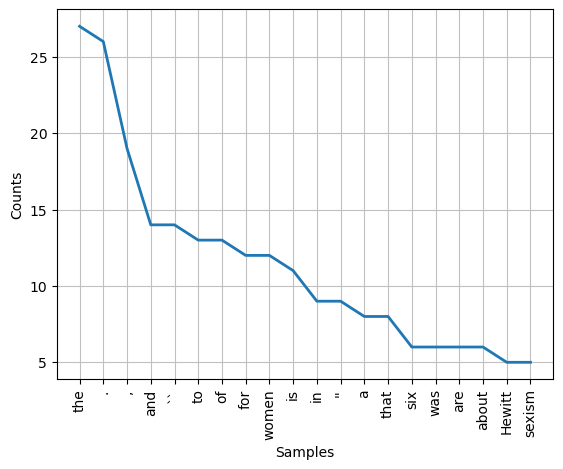

<Axes: xlabel='Samples', ylabel='Counts'>

In [72]:
# plotting them out
fdist1.plot(20)
fdist2.plot(20)
fdist3.plot(20)

In [77]:
# taking out punctuations
no_business_puncs = []
no_entertainment_puncs = []
no_politics_puncs = []

for w in words1:
    if w.isalpha():
        no_business_puncs.append(w.lower())

for w in words2:
    if w.isalpha():
        no_entertainment_puncs.append(w.lower())
        
for w in words3:
    if w.isalpha():
        no_politics_puncs.append(w.lower())

In [81]:
print(len(no_business_puncs))
no_business_puncs

389


['ad',
 'sales',
 'boost',
 'time',
 'warner',
 'profit',
 'quarterly',
 'profits',
 'at',
 'us',
 'media',
 'giant',
 'timewarner',
 'jumped',
 'to',
 'for',
 'the',
 'three',
 'months',
 'to',
 'december',
 'from',
 'the',
 'firm',
 'which',
 'is',
 'now',
 'one',
 'of',
 'the',
 'biggest',
 'investors',
 'in',
 'google',
 'benefited',
 'from',
 'sales',
 'of',
 'internet',
 'connections',
 'and',
 'higher',
 'advert',
 'sales',
 'timewarner',
 'said',
 'fourth',
 'quarter',
 'sales',
 'rose',
 'to',
 'from',
 'its',
 'profits',
 'were',
 'buoyed',
 'by',
 'gains',
 'which',
 'offset',
 'a',
 'profit',
 'dip',
 'at',
 'warner',
 'bros',
 'and',
 'less',
 'users',
 'for',
 'aol',
 'time',
 'warner',
 'said',
 'on',
 'friday',
 'that',
 'it',
 'now',
 'owns',
 'of',
 'google',
 'but',
 'its',
 'own',
 'internet',
 'business',
 'aol',
 'had',
 'has',
 'mixed',
 'fortunes',
 'it',
 'lost',
 'subscribers',
 'in',
 'the',
 'fourth',
 'quarter',
 'profits',
 'were',
 'lower',
 'than',
 'in'

In [82]:
print(len(no_entertainment_puncs))
no_entertainment_puncs

245


['jarre',
 'joins',
 'fairytale',
 'celebration',
 'french',
 'musician',
 'jarre',
 'is',
 'to',
 'perform',
 'at',
 'a',
 'concert',
 'in',
 'copenhagen',
 'to',
 'mark',
 'the',
 'bicentennial',
 'of',
 'the',
 'birth',
 'of',
 'writer',
 'hans',
 'christian',
 'andersen',
 'denmark',
 'is',
 'holding',
 'a',
 'celebration',
 'of',
 'the',
 'life',
 'of',
 'the',
 'author',
 'with',
 'a',
 'concert',
 'at',
 'parken',
 'stadium',
 'on',
 'april',
 'other',
 'stars',
 'are',
 'expected',
 'to',
 'join',
 'the',
 'in',
 'the',
 'coming',
 'months',
 'and',
 'the',
 'danish',
 'royal',
 'family',
 'will',
 'attend',
 'christian',
 'andersen',
 'fairy',
 'tales',
 'are',
 'timeless',
 'and',
 'universal',
 'said',
 'jarre',
 'for',
 'all',
 'of',
 'us',
 'at',
 'any',
 'age',
 'there',
 'is',
 'always',
 'beyond',
 'the',
 'pure',
 'enjoyment',
 'of',
 'the',
 'tale',
 'a',
 'message',
 'to',
 'learn',
 'there',
 'are',
 'celebrations',
 'planned',
 'across',
 'the',
 'world',
 'to',
 '

In [83]:
print(len(no_politics_puncs))
no_politics_puncs

506


['hewitt',
 'decries',
 'plans',
 'to',
 'extend',
 'paid',
 'maternity',
 'leave',
 'beyond',
 'six',
 'months',
 'should',
 'be',
 'prominent',
 'in',
 'labour',
 'election',
 'manifesto',
 'the',
 'trade',
 'and',
 'industry',
 'secretary',
 'has',
 'said',
 'patricia',
 'hewitt',
 'said',
 'the',
 'cost',
 'of',
 'the',
 'proposals',
 'was',
 'being',
 'evaluated',
 'but',
 'it',
 'was',
 'an',
 'increasingly',
 'high',
 'priority',
 'and',
 'a',
 'shared',
 'goal',
 'across',
 'government',
 'ms',
 'hewitt',
 'was',
 'speaking',
 'at',
 'a',
 'gender',
 'and',
 'productivity',
 'seminar',
 'organised',
 'by',
 'the',
 'equal',
 'opportunities',
 'commission',
 'eoc',
 'mothers',
 'can',
 'currently',
 'take',
 'up',
 'to',
 'six',
 'months',
 'paid',
 'leave',
 'and',
 'six',
 'unpaid',
 'ms',
 'hewitt',
 'told',
 'the',
 'seminar',
 'clearly',
 'one',
 'of',
 'the',
 'things',
 'we',
 'need',
 'to',
 'do',
 'in',
 'the',
 'future',
 'is',
 'to',
 'extend',
 'the',
 'period',
 'of

In [100]:
# stopwords = stopwords.words("english")

In [101]:
clean1 = []
clean2 = []
clean3 = []

for p in no_business_puncs:
    if p not in stopwords:
        clean1.append(p)

for p in no_entertainment_puncs:
    if p not in stopwords:
        clean2.append(p)

for p in no_politics_puncs:
    if p not in stopwords:
        clean3.append(p)

In [102]:
# time to plot them again to see how much has changed
fdist1 = FreqDist(clean1)
fdist2 = FreqDist(clean2)
fdist3 = FreqDist(clean3)

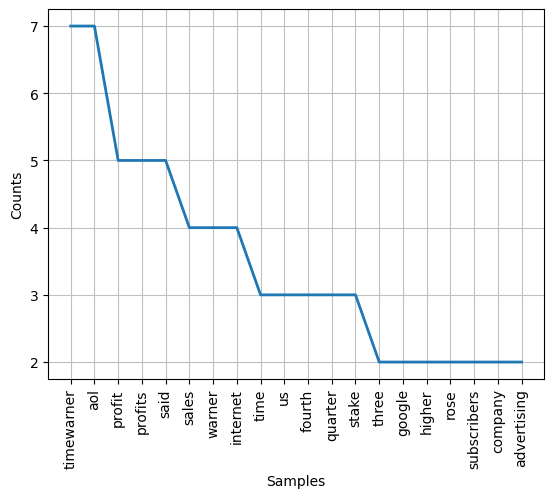

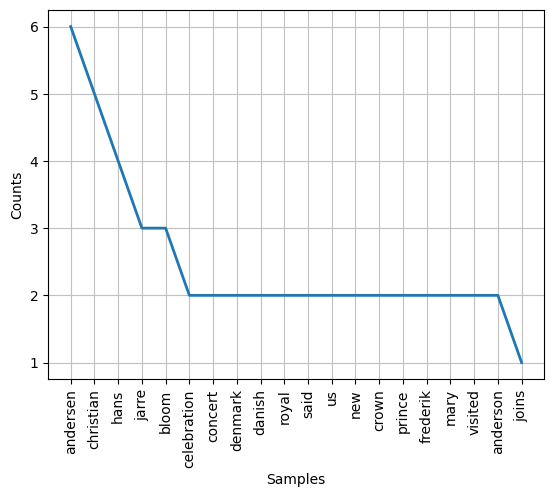

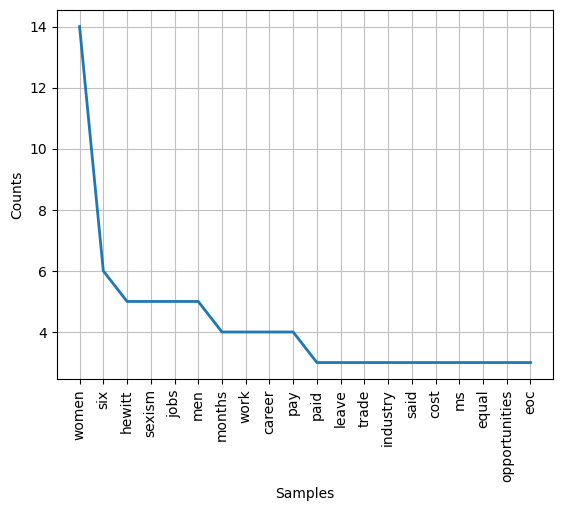

<Axes: xlabel='Samples', ylabel='Counts'>

In [103]:
fdist1.plot(20)
fdist2.plot(20)
fdist3.plot(20)

In [106]:
nlp = spacy.load('en_core_web_sm')

In [119]:
# getting the first three sentences from the first value
# the first value had a better frequency when it came to most common words 
doc = nlp(text1[:387])
displacy.render(doc, style='ent', jupyter=True)

In [121]:
for entity in doc.ents:
    print(f"{entity.label_}: {entity.text}")

ORG: Time Warner
DATE: Quarterly
GPE: US
ORG: TimeWarner
PERCENT: 76%
MONEY: 1.13bn
CARDINAL: Â£600
DATE: the three months to December
MONEY: 639
DATE: year-earlier
ORG: Google
ORG: TimeWarner
DATE: fourth quarter
PERCENT: 2%
MONEY: 11.1bn
MONEY: 10.9bn


In [129]:
color = {'ORG': 'orange', 'DATE': 'light', 'PERCENT': 'aqua', 'MONEY': 'green', 'CARDINAL': 'red'}

options = {'ents': ['ORG', 'DATE', 'PERCENT', 'MONEY', 'CARDINAL'], 'colors':color}

displacy.render(doc, style="ent", options=options)

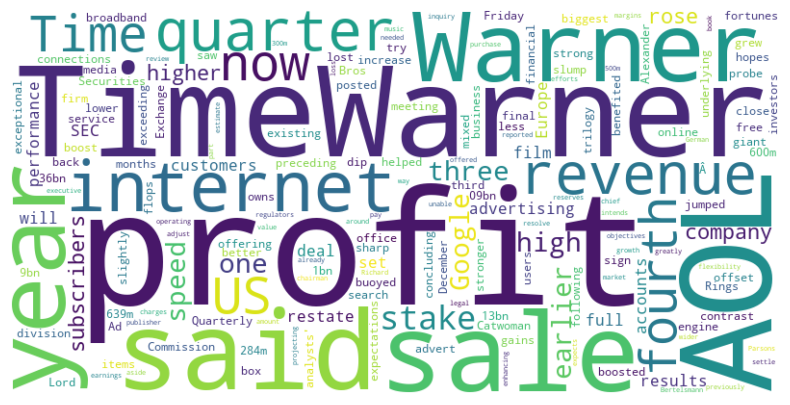

In [130]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text1)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

While these might've been bad examples, I was hoping to see advertisements, BBC affliates, and/or BBC's name itself to appear quite often between the three articles. Maybe it would've been better to have web scraped BBC's website to find these parameters that I am looking for. 